In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy import stats

In [34]:
!pip install plotly_express
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
plt.rcParams['figure.figsize']  = (16, 14)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lichess_2013_2014_Complete.csv', quoting=csv.QUOTE_NONE, error_bad_lines=False, warn_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



In [38]:
#Limpeza dos dados
#Padronização do tipo da coluna Numer_of_Moves
df['Number_of_Moves'] =  pd.to_numeric(df['Number_of_Moves'], errors='coerce')

#Remoção das partidas com menos de 3 movimentos que foram abandonadas ou terminadas por tempo
condition = (df['Number_of_Moves'] >= 3) | (df['Termination'] == 'Normal')
df = df.loc[condition]

#limpeza das linhas nulas
df = df.dropna()


In [39]:
#Remove outliers using zscore
df['IT_Zscore'] = stats.zscore(df['InitialTime'])
df['Inc_Zscore'] = stats.zscore(df['Increment'])
condition = (df['IT_Zscore'] <= 3) & (df['Inc_Zscore'] <= 3)
df = df.loc[condition]

In [40]:
#Adição das colunas média e razão
df['MatchElo'] = df['BlackElo']/df['WhiteElo']
df['RatioElo'] = np.where(
    df['BlackElo']>df['WhiteElo'],
    df['BlackElo']-df['WhiteElo'],
    df['WhiteElo']-df['BlackElo']
    )

#Colunas de interesse
df = df[['WhiteElo','BlackElo','RatioElo','MatchElo','Winner','InitialTime','Increment','TimeControl','Opening','ECO','Number_of_Moves']]
df.shape

(12796166, 11)

In [41]:
df.head()

,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,1639,1403,236,0.856010,White,600,8,Rapid,French Defense: Normal Variation,C00,13.0
1,1643,1747,104,1.063299,White,420,17,Rapid,Four Knights Game: Italian Variation,C50,11.0
2,1824,1973,149,1.081689,Black,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47.0
3,1765,1815,50,1.028329,Black,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23.0
4,1477,1487,10,1.006770,White,300,3,Blitz,Owen Defense,B00,32.0


In [42]:
#Short description of the dataframe
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,WhiteElo,BlackElo,RatioElo,MatchElo,InitialTime,Increment,Number_of_Moves
count,12796166.00,12796166.00,12796166.00,12796166.00,12796166.00,12796166.00,12796166.00
mean,1617.33,1610.39,147.44,1.00,283.67,2.06,34.22
std,228.33,232.20,134.58,0.13,237.57,3.23,15.71
min,511.00,704.00,0.00,0.35,0.00,0.00,1.00
25%,1466.00,1458.00,49.00,0.93,120.00,0.00,23.00
50%,1614.00,1606.00,110.00,1.00,300.00,0.00,32.00
75%,1767.00,1761.00,205.00,1.07,300.00,3.00,43.00
max,2970.00,2970.00,1628.00,2.94,1380.00,18.00,227.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1470a78610>,
      dtype=object)

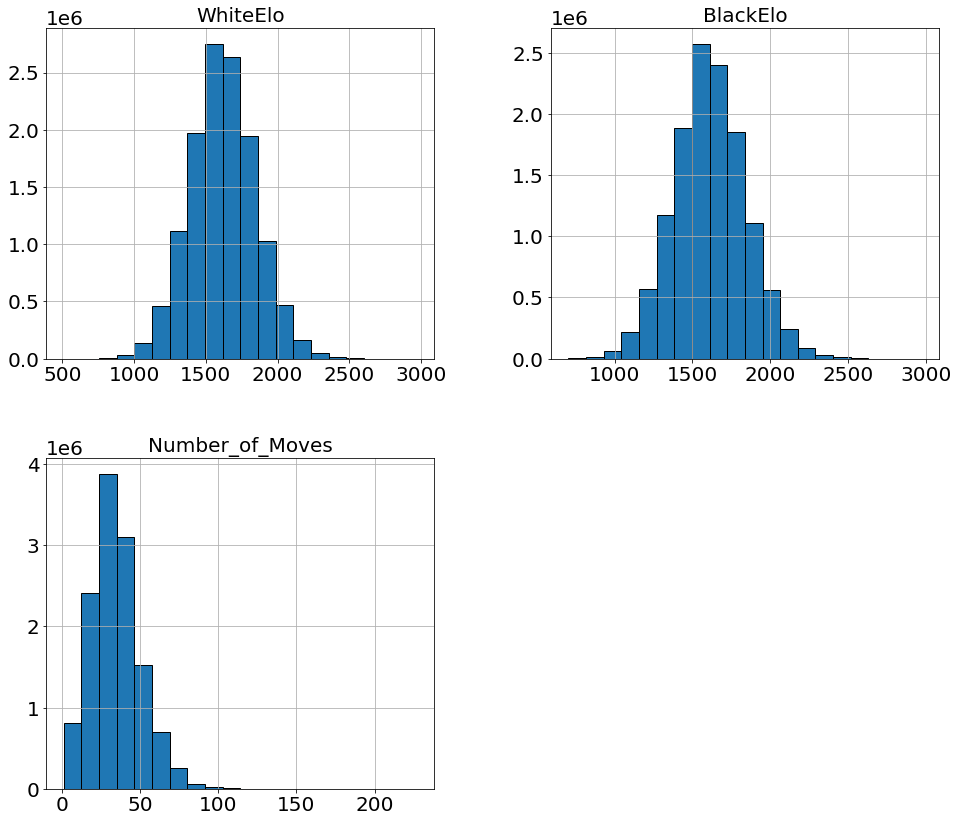

In [43]:
df.hist(bins=20, column=['WhiteElo', 'BlackElo', 'Number_of_Moves'],edgecolor='black',)

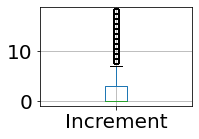

In [52]:
plt.figure(figsize=99(6,4))

plt.subplot(1,1,1)
df.boxplot(column=['InitialTime'], figsize=(3,2))

plt.subplot(2,2,2)
df.boxplot(column=['Increment'], figsize=(3,2))


In [45]:
#10 most frequent opening
df_countWhiteWins = df.groupby(['Opening']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

Opening
Van't Kruijs Opening                             379937
Modern Defense                                   277227
Horwitz Defense                                  270084
Scandinavian Defense: Mieses-Kotroc Variation    250937
Owen Defense                                     241415
French Defense: Knight Variation                 221634
Caro-Kann Defense                                193413
Hungarian Opening                                192928
Sicilian Defense                                 190413
Sicilian Defense: Bowdler Attack                 189067
Name: Winner, dtype: int64

In [46]:
#Average moves per
df_averageMovesPerGame = df['Number_of_Moves'].mean()
df_averageMovesPerGame

34.215125999459524